SECTION1: Building dataset of averaged images and manually drawn ROIs

In [4]:
import os
import scipy.io
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [13]:
base_path = 'C:/Data/Data/Analysed_data/Manual_ROI_results/'
ML_dataset_path = 'C:/Data/Data/Analysed_data/Analysis_results/MBON_segmentation_project/Dataset/'

sub_dirs = [f.path for f in os.scandir(os.path.join(base_path, '')) if f.is_dir()]

fly_n = 0   #iterator to keep track of fly number (ie sample number)
bk_vals = []
im_stack = np.zeros((512, 512, 640))
ROI_stack = np.zeros((512, 512, 640))
#loop to look within each date's dataset folder
for curr_subdir in sub_dirs:
    
    #older folders don't include the ROI_mat.mat file, so skipping them
    if curr_subdir[-7:] == 'pyfiles':
        continue
    elif int(curr_subdir[-8:]) < 20190227:
        continue
    
    
    curr_subsubdirs = [f.path for f in os.scandir(os.path.join(base_path, curr_subdir)) if f.is_dir()]
    
    for curr_subsubdir in curr_subsubdirs:        
        #reading in manually defined regions of interest (segmentation masks)
        ROI_mat =  scipy.io.loadmat(os.path.abspath(os.path.join(base_path, curr_subdir, curr_subsubdir, 'ROI_mat.mat'))) 
        ROI_mat = ROI_mat['ROI_mat']
        
        #skipping if there are more than 1 ROIs marked (misplaced KC dataset)
        if len(ROI_mat.shape) > 2:
            continue
        
        ROI_stack[:, :, fly_n] = ROI_mat
        #COMPUTED MEAN BACKGROUND INTENSITY HERE: Found that np.mean(bk_vals) = 118.056, across 279 datasets
        #bk_ROI = scipy.io.loadmat(os.path.abspath(os.path.join(base_path, curr_subdir, curr_subsubdir, 'bk_ROI.mat')))
        #bk_ROI = bk_ROI['bk_ROI']
        #bk_vals = bk_vals + [np.nanmean(np.nanmean(ref_im[bk_ROI == 1]))]
        #print(bk_vals[iter_n])
        
        
        #reading in all images 
        mean_bk_val = 118.056
        ref_im = scipy.io.loadmat(os.path.abspath(os.path.join(base_path, curr_subdir, curr_subsubdir, 'ref_im.mat')))
        ref_im = ref_im['ref_im']
        ref_im = ref_im - mean_bk_val
        im_stack[:, :, fly_n] = ref_im
        
        fly_n = fly_n + 1   
        #print(f"flyn: {str(fly_n)}")
        print('\r flyn:' + str(fly_n) + ' ' + curr_subdir, end="\r")   
    


In [17]:
#saving read in images to disk
save_path = os.path.join(base_path, 'saved_pyfiles')
with open(save_path + '/images' + '.pickle', 'wb') as f:
        pickle.dump(im_stack, f, pickle.HIGHEST_PROTOCOL)
with open(save_path + '/ROIs' + '.pickle', 'wb') as f:
        pickle.dump(ROI_stack, f, pickle.HIGHEST_PROTOCOL)

In [16]:
save_path

'C:/Data/Data/Analysed_data/Manual_ROI_results/saved_pyfiles'

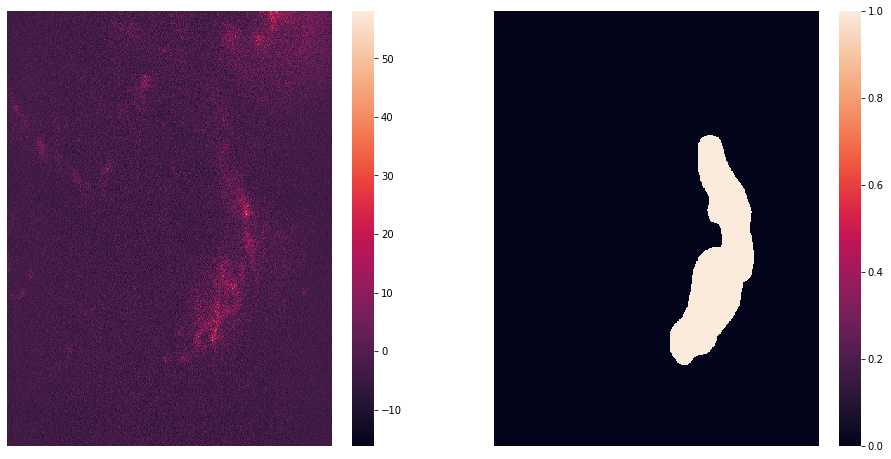

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))

fly_n = 22
im1 = sns.heatmap(im_stack[:, :, fly_n], ax = ax1)
im2 = sns.heatmap(ROI_stack[:, :, fly_n], ax = ax2)

im1.set(yticklabels=[])  
im1.tick_params(left=False)  
im1.set(xticklabels=[])  
im1.tick_params(bottom=False)  

im2.set(yticklabels=[])  
im2.tick_params(left=False)  
im2.set(xticklabels=[])  
im2.tick_params(bottom=False)  